In [1]:
import pandas as pd

df = pd.read_csv('Salary_Data.csv')

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [2]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [3]:
df = df.dropna()

In [4]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [5]:
df['Age'].value_counts()

,count
Age,
27.0,516
30.0,449
29.0,444
28.0,429
33.0,398
26.0,393
31.0,364
32.0,351
34.0,309


In [6]:
threshold = 0.005 * len(df)  # ~33.5
job_counts = df['Job Title'].value_counts()
rare_jobs = job_counts[job_counts < threshold].index
df['Job Title'] = df['Job Title'].apply(lambda x: 'Other' if x in rare_jobs else x)


/tmp/ipython-input-6-1552822787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'].apply(lambda x: 'Other' if x in rare_jobs else x)


In [7]:
df['Education Level'] = df['Education Level'].replace({
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree",
    "phD": "PhD"
})

/tmp/ipython-input-7-3359453561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].replace({


In [8]:
categorical_cols = ['Job Title', 'Education Level', 'Gender']
numeric_cols = ['Age', 'Years of Experience']

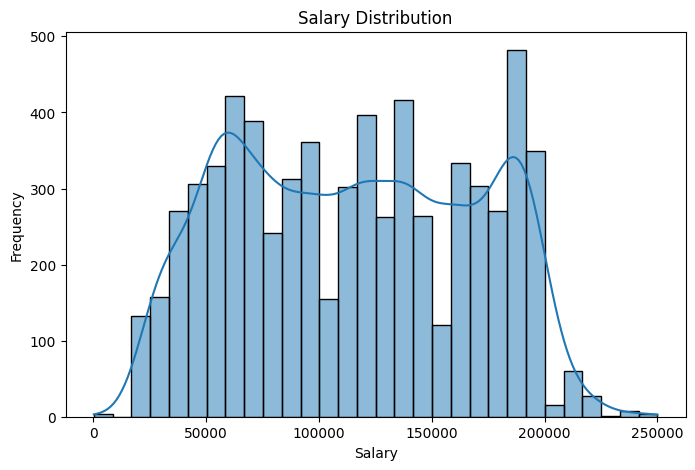

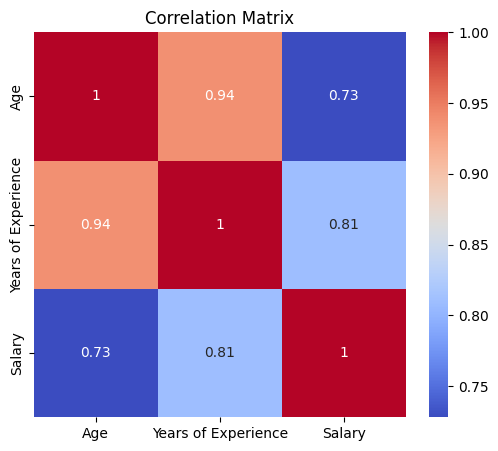

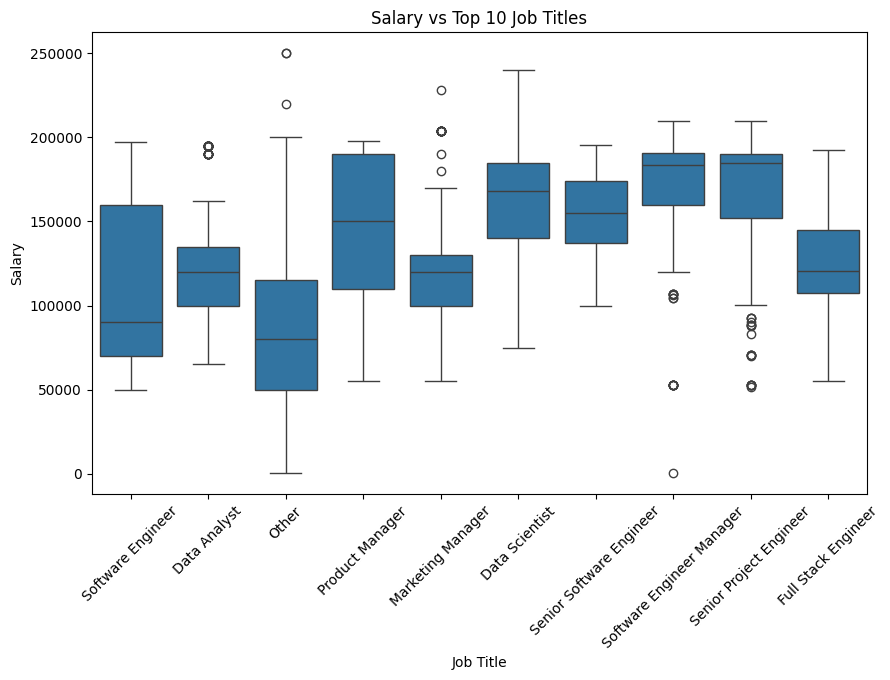

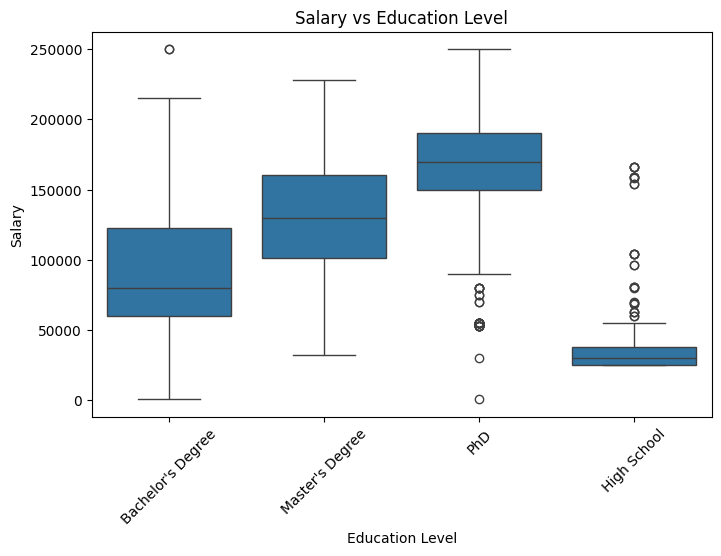

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Salary Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(6,5))
corr = df[['Age', 'Years of Experience', 'Salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Boxplots

# Salary vs Job Title (Top 10)
top_jobs = df['Job Title'].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.boxplot(x='Job Title', y='Salary', data=df[df['Job Title'].isin(top_jobs)])
plt.xticks(rotation=45)
plt.title('Salary vs Top 10 Job Titles')
plt.show()

# Salary vs Education Level
plt.figure(figsize=(8,5))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary vs Education Level')
plt.show()


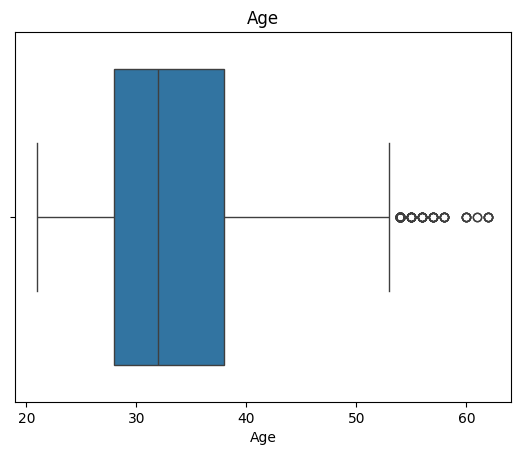

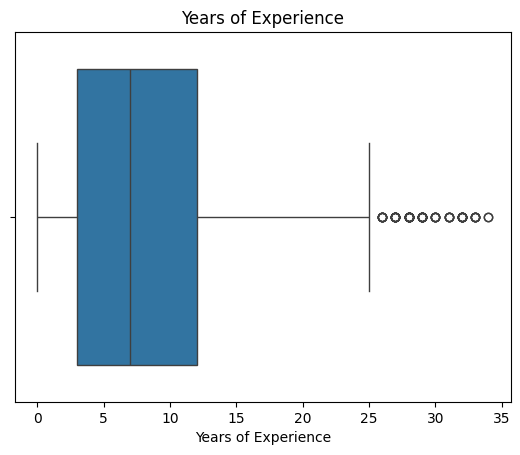

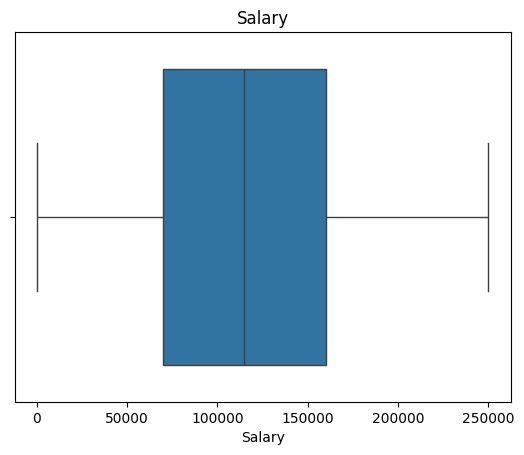

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()
sns.boxplot(x=df['Salary'])
plt.title('Salary')
plt.show()


Handling outliers for: Age
Original size: 6698
After IQR: 6575 rows
After Z-score: 6670 rows


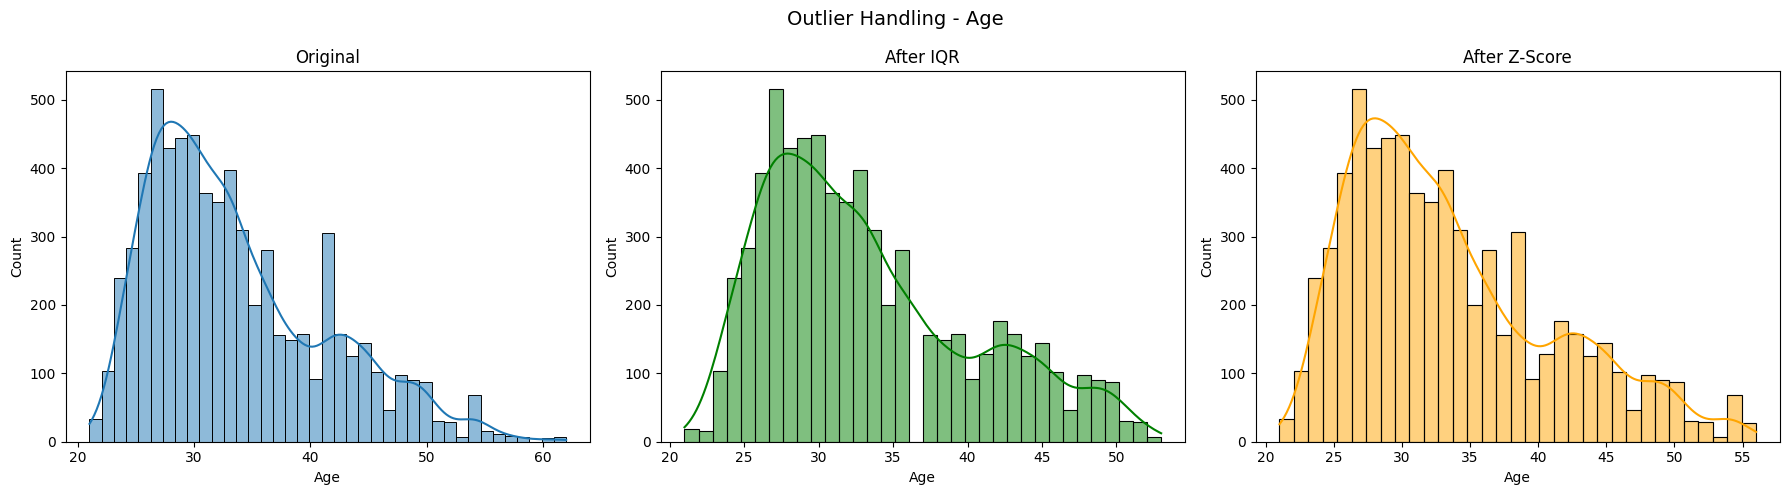

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

def handle_outliers_all_numeric(df):

    for column in numeric_cols:
        print(f"\nHandling outliers for: {column}")

        # IQR Method
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_filtered = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

        # Z-Score Method
        z_scores = zscore(df[column])
        zscore_filtered = df[(np.abs(z_scores) < 3)]

        # Print stats
        print(f"Original size: {len(df)}")
        print(f"After IQR: {len(iqr_filtered)} rows")
        print(f"After Z-score: {len(zscore_filtered)} rows")

        # Plotting
        plt.figure(figsize=(18, 5))
        plt.suptitle(f"Outlier Handling - {column}", fontsize=14)

        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=True)
        plt.title('Original')

        plt.subplot(1, 3, 2)
        sns.histplot(iqr_filtered[column], kde=True, color='green')
        plt.title('After IQR')

        plt.subplot(1, 3, 3)
        sns.histplot(zscore_filtered[column], kde=True, color='orange')
        plt.title('After Z-Score')

        plt.tight_layout()
        plt.show()
        return iqr_filtered, zscore_filtered

# Call the function on your scaled DataFrame
df_iqr, df_zscore = handle_outliers_all_numeric(df)

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform
encoded_array = ohe.fit_transform(df_iqr[categorical_cols])

# Get encoded column names
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Create encoded DataFrame
df_ohe = pd.DataFrame(encoded_array, columns=encoded_cols, index=df_iqr.index)

# Create df_encoded_final by dropping original categorical columns and adding encoded columns
df_encoded= pd.concat([df_iqr.drop(columns=categorical_cols), df_ohe], axis=1)

In [13]:
df_encoded

,Age,Years of Experience,Salary,Job Title_Back end Developer,Job Title_Content Marketing Manager,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_Digital Marketing Manager,Job Title_Director of Data Science,Job Title_Director of HR,...,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Web Developer,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Gender_Female,Gender_Male,Gender_Other
0,32.0,5.0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28.0,3.0,65000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,45.0,15.0,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,36.0,7.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,52.0,20.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,20.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6700,32.0,3.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6701,30.0,4.0,55000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6702,46.0,14.0,140000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [15]:
max_age = df_iqr['Age'].max()

print(f"Maximum age: {max_age}")

Maximum age: 53.0


In [16]:
X = df_scaled.drop('Salary', axis=1)
y = df_scaled['Salary']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression")
print(f"Train R²: {r2_score(y_train, lr.predict(X_train)):.4f}")
print(f"Test R²:  {r2_score(y_test, y_pred_lr):.4f}")
print(f"MAE:      {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE:      {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"RMSE:     {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")

Linear Regression
Train R²: 0.8408
Test R²:  0.8434
MAE:      15098.00
MSE:      419332495.46
RMSE:     20477.61


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Regressor")
print(f"Train R²: {r2_score(y_train, rf.predict(X_train)):.4f}")
print(f"Test R²:  {r2_score(y_test, y_pred_rf):.4f}")
print(f"MAE:      {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE:      {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"RMSE:     {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")


Random Forest Regressor
Train R²: 0.9912
Test R²:  0.9734
MAE:      3206.35
MSE:      71176790.36
RMSE:     8436.63


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting Regressor")
print(f"Train R²: {r2_score(y_train, gbr.predict(X_train)):.4f}")
print(f"Test R²:  {r2_score(y_test, y_pred_gbr):.4f}")
print(f"MAE:      {mean_absolute_error(y_test, y_pred_gbr):.2f}")
print(f"MSE:      {mean_squared_error(y_test, y_pred_gbr):.2f}")
print(f"RMSE:     {np.sqrt(mean_squared_error(y_test, y_pred_gbr)):.2f}")


Gradient Boosting Regressor
Train R²: 0.9153
Test R²:  0.9100
MAE:      11565.52
MSE:      241082828.68
RMSE:     15526.84


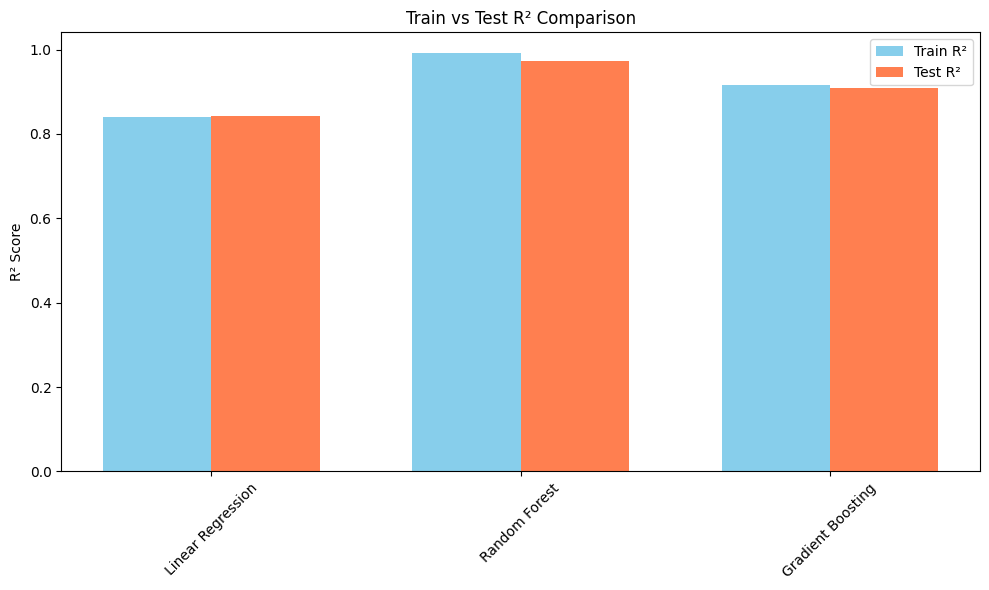

In [21]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Train R²': [
        r2_score(y_train, lr.predict(X_train)),
        r2_score(y_train, rf.predict(X_train)),
        r2_score(y_train, gbr.predict(X_train))
    ],
    'Test R²': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gbr)
    ]
})
# Final R² Comparison Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
bar_width = 0.35

plt.bar(x - bar_width/2, results_df['Train R²'], width=bar_width, label='Train R²', color='skyblue')
plt.bar(x + bar_width/2, results_df['Test R²'], width=bar_width, label='Test R²', color='coral')

plt.xticks(x, results_df['Model'], rotation=45)
plt.ylabel("R² Score")
plt.title("Train vs Test R² Comparison")
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
import pickle

# Save OneHotEncoder
with open("ohe.pkl", "wb") as f:
    pickle.dump(ohe, f)

# Save Scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save Model
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)